# DSCI 303 - Project 03
### Felix Crader

In [1]:
import numpy as np, math, matplotlib.pyplot as plt

## Part A: Stock Simulation Function
In this section, we will be creating and testing a function to generate sequences of simulated daily stock prices. 

In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc = rate / 252, scale = vol / (252 ** .5), size = days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round(daily_multipliers * start, 2)
    start_conc = np.concatenate([[start], daily_prices])
    return start_conc

Now, let us test the function.

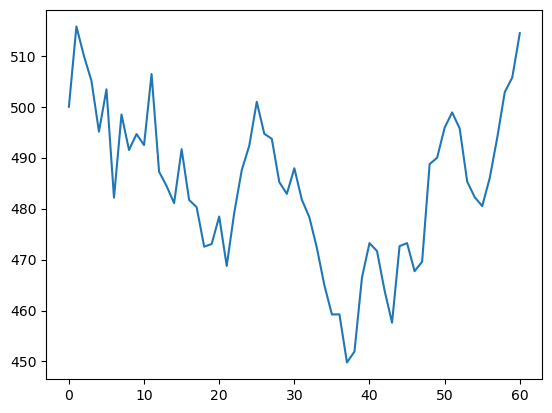

In [3]:
np.random.seed(1)
sim1 = simulate_stock(500, .08, .3, 60)
plt.plot(sim1)
plt.show()

## Part B: Annual Yield Function
Here, we will create and test a function that find the annual yield for a particular run. 

In [4]:
def find_yield(run):
    final_price = run[-1]
    initial_price = run[0]
    
    days_in_run = len(run) - 1
    
    annual_yield = math.log(final_price / initial_price) * (252 / days_in_run)
    annual_yield = round(annual_yield, 4)
    return annual_yield

We will now test this function on the initial simulated run with a seed of 1.

In [5]:
sim1_annual = find_yield(sim1)
print(sim1_annual)

0.1196


Now, we will explore the variability within different simulations.

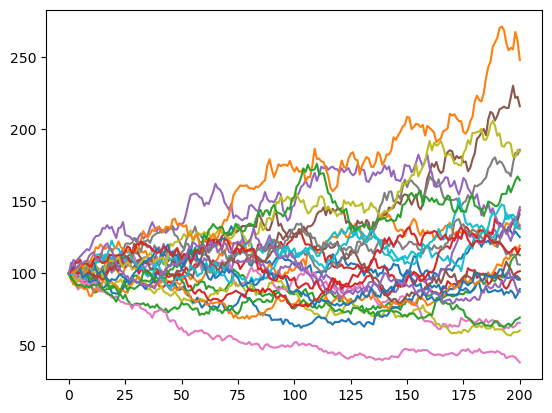

In [6]:
sim25 = simulate_stock(100, .06, .4, 200)
amount_runs = 25

yield_list = []

for i in range(amount_runs):
    sim25 = simulate_stock(100, .06, .4, 200)
    yield_run = find_yield(sim25)
    yield_list.append(yield_run)
    plt.plot(sim25)


Let us display the yields for the previous 25 runs.

In [7]:
print(yield_list)

[0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978, -0.1716]


## Part C: Finding Seeds that Generate Specific Outcomes
We are going to attempt to find seeds that give specific outcomes.

In the cell below, Stock A has the highest simulated final price.

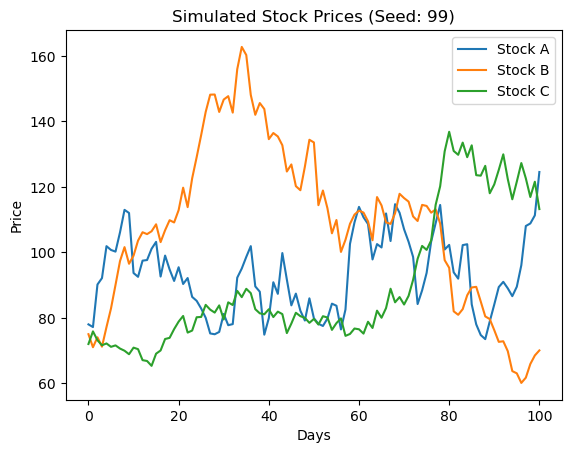

{'Stock A': 124.56, 'Stock B': 70.04, 'Stock C': 113.23}

In [8]:
def final_price_plot(seed):
    np.random.seed(seed)
    stock_a = simulate_stock(78, .04, 1.2, 100)
    stock_b = simulate_stock(75, .08, .8, 100)
    stock_c = simulate_stock(72, .16, .6, 100)
    
    plt.plot(stock_a, label='Stock A')
    plt.plot(stock_b, label='Stock B')
    plt.plot(stock_c, label='Stock C')
    
    plt.title(f"Simulated Stock Prices (Seed: {seed})")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    final_prices = {'Stock A': stock_a[-1], 'Stock B': stock_b[-1], 'Stock C': stock_c[-1]}
    return final_prices
final_price_plot(99)

In the cell below, Stock B has the highest simulated final price.

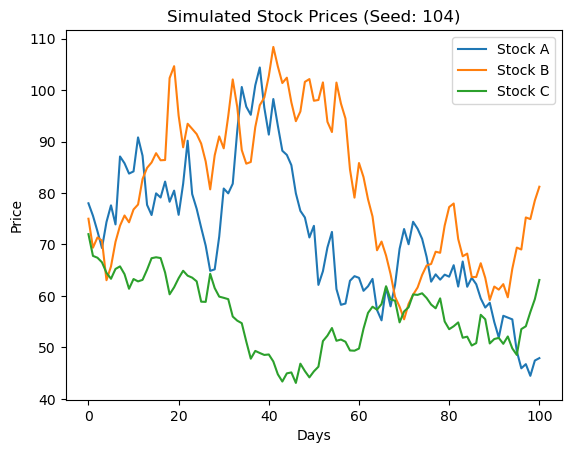

{'Stock A': 47.91, 'Stock B': 81.22, 'Stock C': 63.1}

In [9]:
final_price_plot(104)

In the cell below, Stock C has the highest simulated final price.

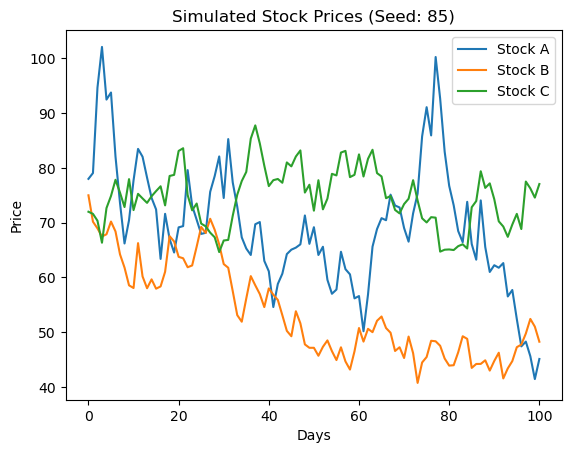

{'Stock A': 45.13, 'Stock B': 48.28, 'Stock C': 77.06}

In [10]:
final_price_plot(85)

## Part D: Monte Carlo Simulation


In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    
    for r in range(num_runs):
        run = simulate_stock(start, rate, vol, days)
        final_prices.append(run[-1])
        annual_yields.append(find_yield(run))
    
    return np.array(final_prices), np.array(annual_yields)

We will now test the function using a specific seed. 

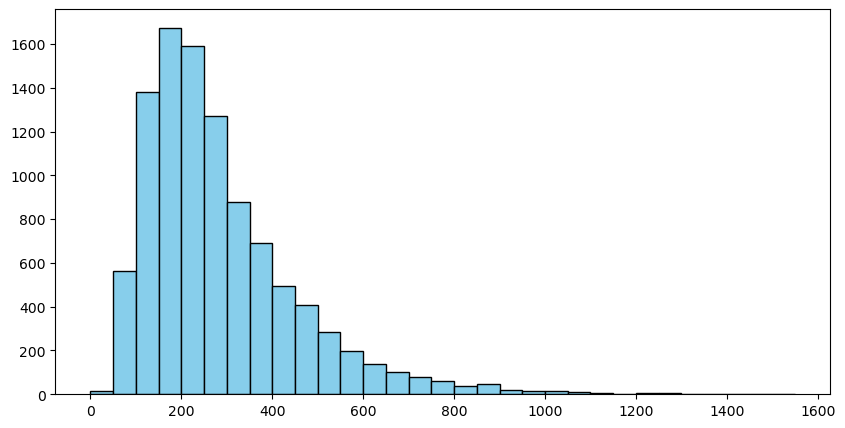

In [12]:
np.random.seed(1)

final_prices, annual_yields = monte_carlo(200, .1, .4, 500, 10000)

plt.figure(figsize=(10, 5))

plt.hist(final_prices, bins=np.arange(0, 1600, 50), color='skyblue', edgecolor='black')
plt.show()

We will now display the 10th, 25th, 50th, 75th and 90th percentiles of the final prices of the simulation.

In [13]:
percentile = [10, 25, 50, 75, 90]
percentile_calc = np.percentile(final_prices, percentile)

for i, j in zip(percentile, percentile_calc):
    print(f"{i}th percentile: {j:.2f}")

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
We will use the monte_carlo function to explore the effects of volatility.

In [14]:
np.random.seed(1)

stock_a = monte_carlo(100, .12, .3, 150, 10000)
stock_b = monte_carlo(100, .12, .7, 150, 10000)

stock_a_mean = np.mean(stock_a)
stock_b_mean = np.mean(stock_b)

stock_a_mean = np.round(stock_a_mean, 4)
stock_b_mean = np.round(stock_b_mean, 4)

print(f'Average Annual Yield for A over 10000 runs: {stock_a_mean}')
print(f'Average Annual Yield for B over 10000 runs: {stock_b_mean}')

Average Annual Yield for A over 10000 runs: 55.2746
Average Annual Yield for B over 10000 runs: 61.9189


Next, we will inspect the previous results by plotting the final prices on a histogram.

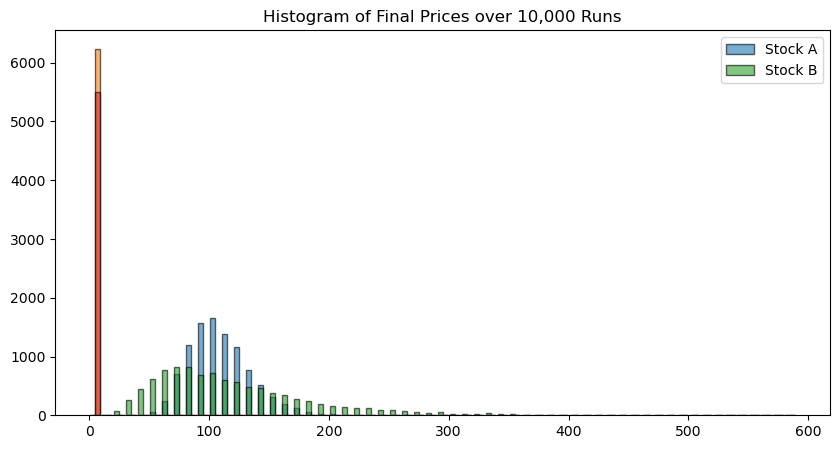

In [15]:
plt.figure(figsize=[10, 5])
plt.hist(stock_a, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock A')
plt.hist(stock_b, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock B')
plt.title("Histogram of Final Prices over 10,000 Runs")
plt.legend()
plt.show()

## Part F: Comparing Two Stocks
Now, let's use the monte_carlo function to estimate probabilities of the performance of two seperate stocks.

In [16]:
np.random.seed(1)

start_price = 120
days = 252
num_runs = 10000

rate_A = 0.08
vol_A = 0.2
final_prices_A, annual_yields_A = monte_carlo(start=start_price, rate=rate_A, vol=vol_A, days=days, num_runs=num_runs)

rate_B = 0.05
vol_B = 0.5
final_prices_B, annual_yields_B = monte_carlo(start=start_price, rate=rate_B, vol=vol_B, days=days, num_runs=num_runs)

final_prices_A[final_prices_A < 0] = 0
final_prices_B[final_prices_B < 0] = 0

A_above_B = np.mean(final_prices_A > final_prices_B)
A_above_150 = np.mean(final_prices_A > 150)
B_above_150 = np.mean(final_prices_B > 150)
A_below_100 = np.mean(final_prices_A < 100)
B_below_100 = np.mean(final_prices_B < 100)

A_above_B = np.round(A_above_B, 4)
A_above_150 = np.round(A_above_150, 4)
B_above_150 = np.round(B_above_150, 4)
A_below_100 = np.round(A_below_100, 4)
B_below_100 = np.round(B_below_100, 4)

print("Proportions of runs in which...")
print("-------------------------------")
print(f"A ends above B: {A_above_B}")
print(f"A ends above 150: {A_above_150}")
print(f"B ends above 150: {B_above_150}")
print(f"A ends below 100: {A_below_100}")
print(f"B ends below 100: {B_below_100}")

Proportions of runs in which...
-------------------------------
A ends above B: 0.5206
A ends above 150: 0.2338
B ends above 150: 0.3619
A ends below 100: 0.095
B ends below 100: 0.3195


## Part G: Expected Call Payoff
In the final part, we will explore call options using the monte_carlo function.

In [17]:
np.random.seed(1)

start_price = 200
days = 150
num_runs = 10000

rate = 0.11
vol = 0.4
final_prices_calloption, annual_yields_calloption = monte_carlo(start=start_price, rate=rate, vol=vol, days=days, num_runs=num_runs)

call_option = final_prices_calloption - 225
call_option[call_option < 0] = 0

call_option_mean = np.mean(call_option)

print(call_option_mean)

27.097683
